In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. 데이터셋 로드 및 기본 정보 확인
url = 'https://raw.githubusercontent.com/Kim-TaeWook/AI-class/refs/heads/main/week6/diabetes.csv'
data = pd.read_csv(url)

In [4]:
# 데이터 크기와 컬럼 정보 확인
print("데이터 크기:", data.shape)
print("\n컬럼 정보:")
print(data.info())

데이터 크기: (768, 9)

컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
# 데이터 앞부분 확인
print("\n데이터 미리보기:")
print(data.head())


데이터 미리보기:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
print("\n기초 통계량:")
print(data.describe())


기초 통계량:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000         

In [7]:
print("\n결측치 확인:")
print(data.isnull().sum())


결측치 확인:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


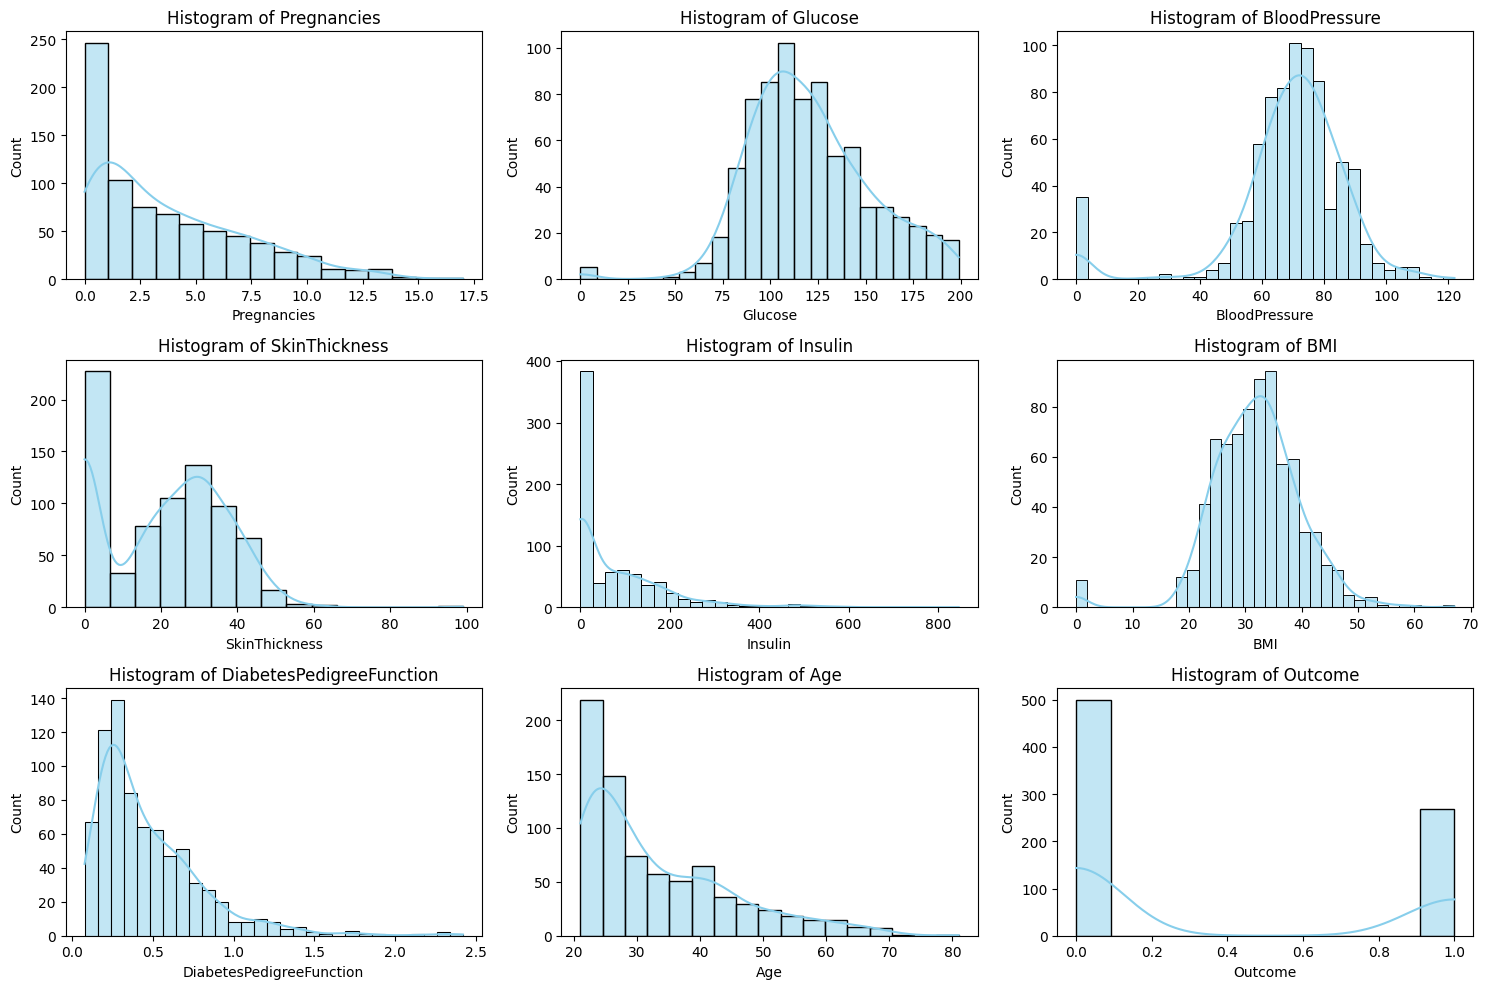

In [8]:
# 3. 각 변수별 분포 시각화
# 히스토그램과 boxplot을 함께 그려 이상치와 분포를 확인합니다.
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

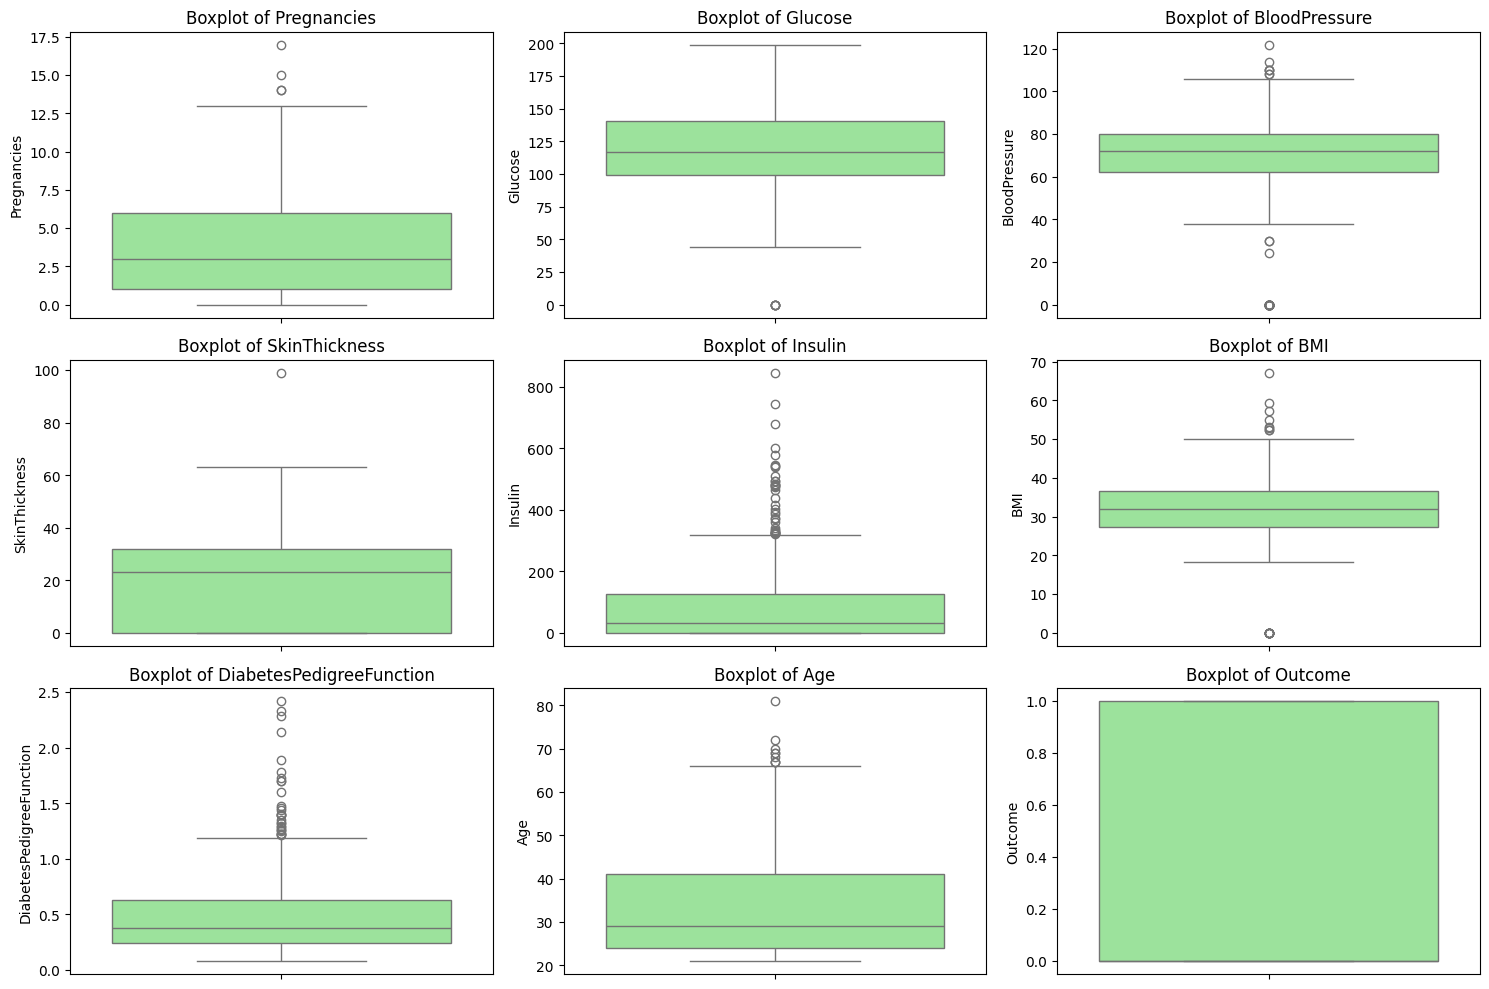

In [9]:
# Boxplot: 이상치 탐색을 위해 각 변수의 boxplot을 그립니다.
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

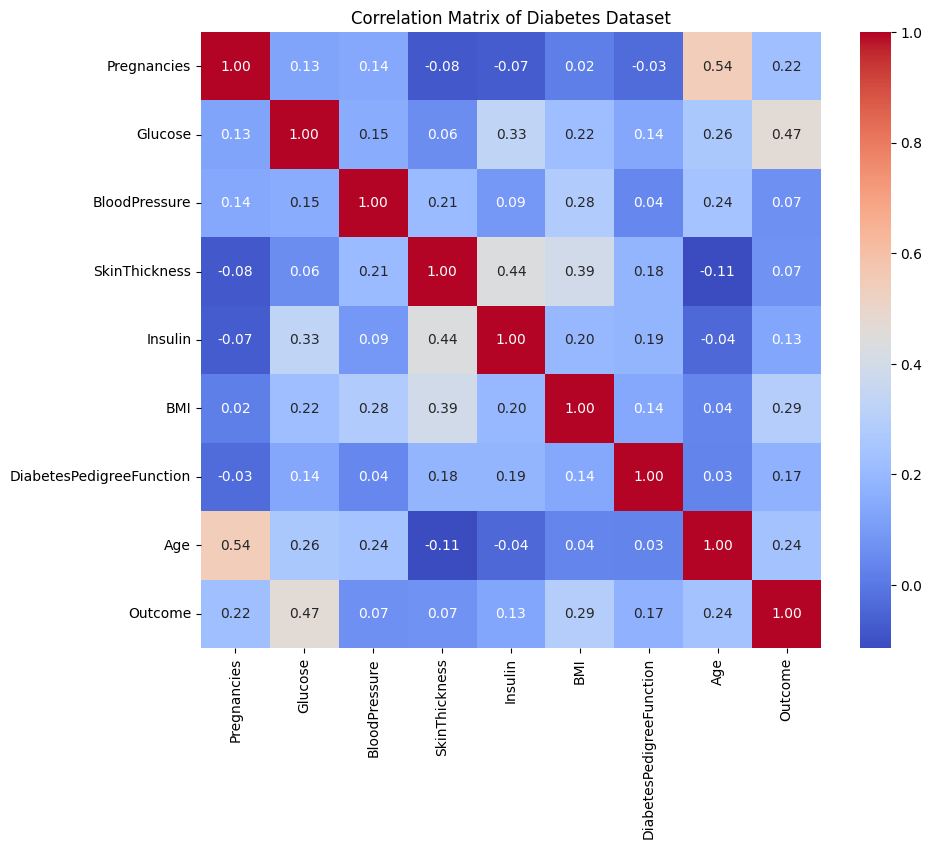

In [10]:
# 4. 상관관계 분석: 상관관계 행렬과 히트맵 시각화
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()

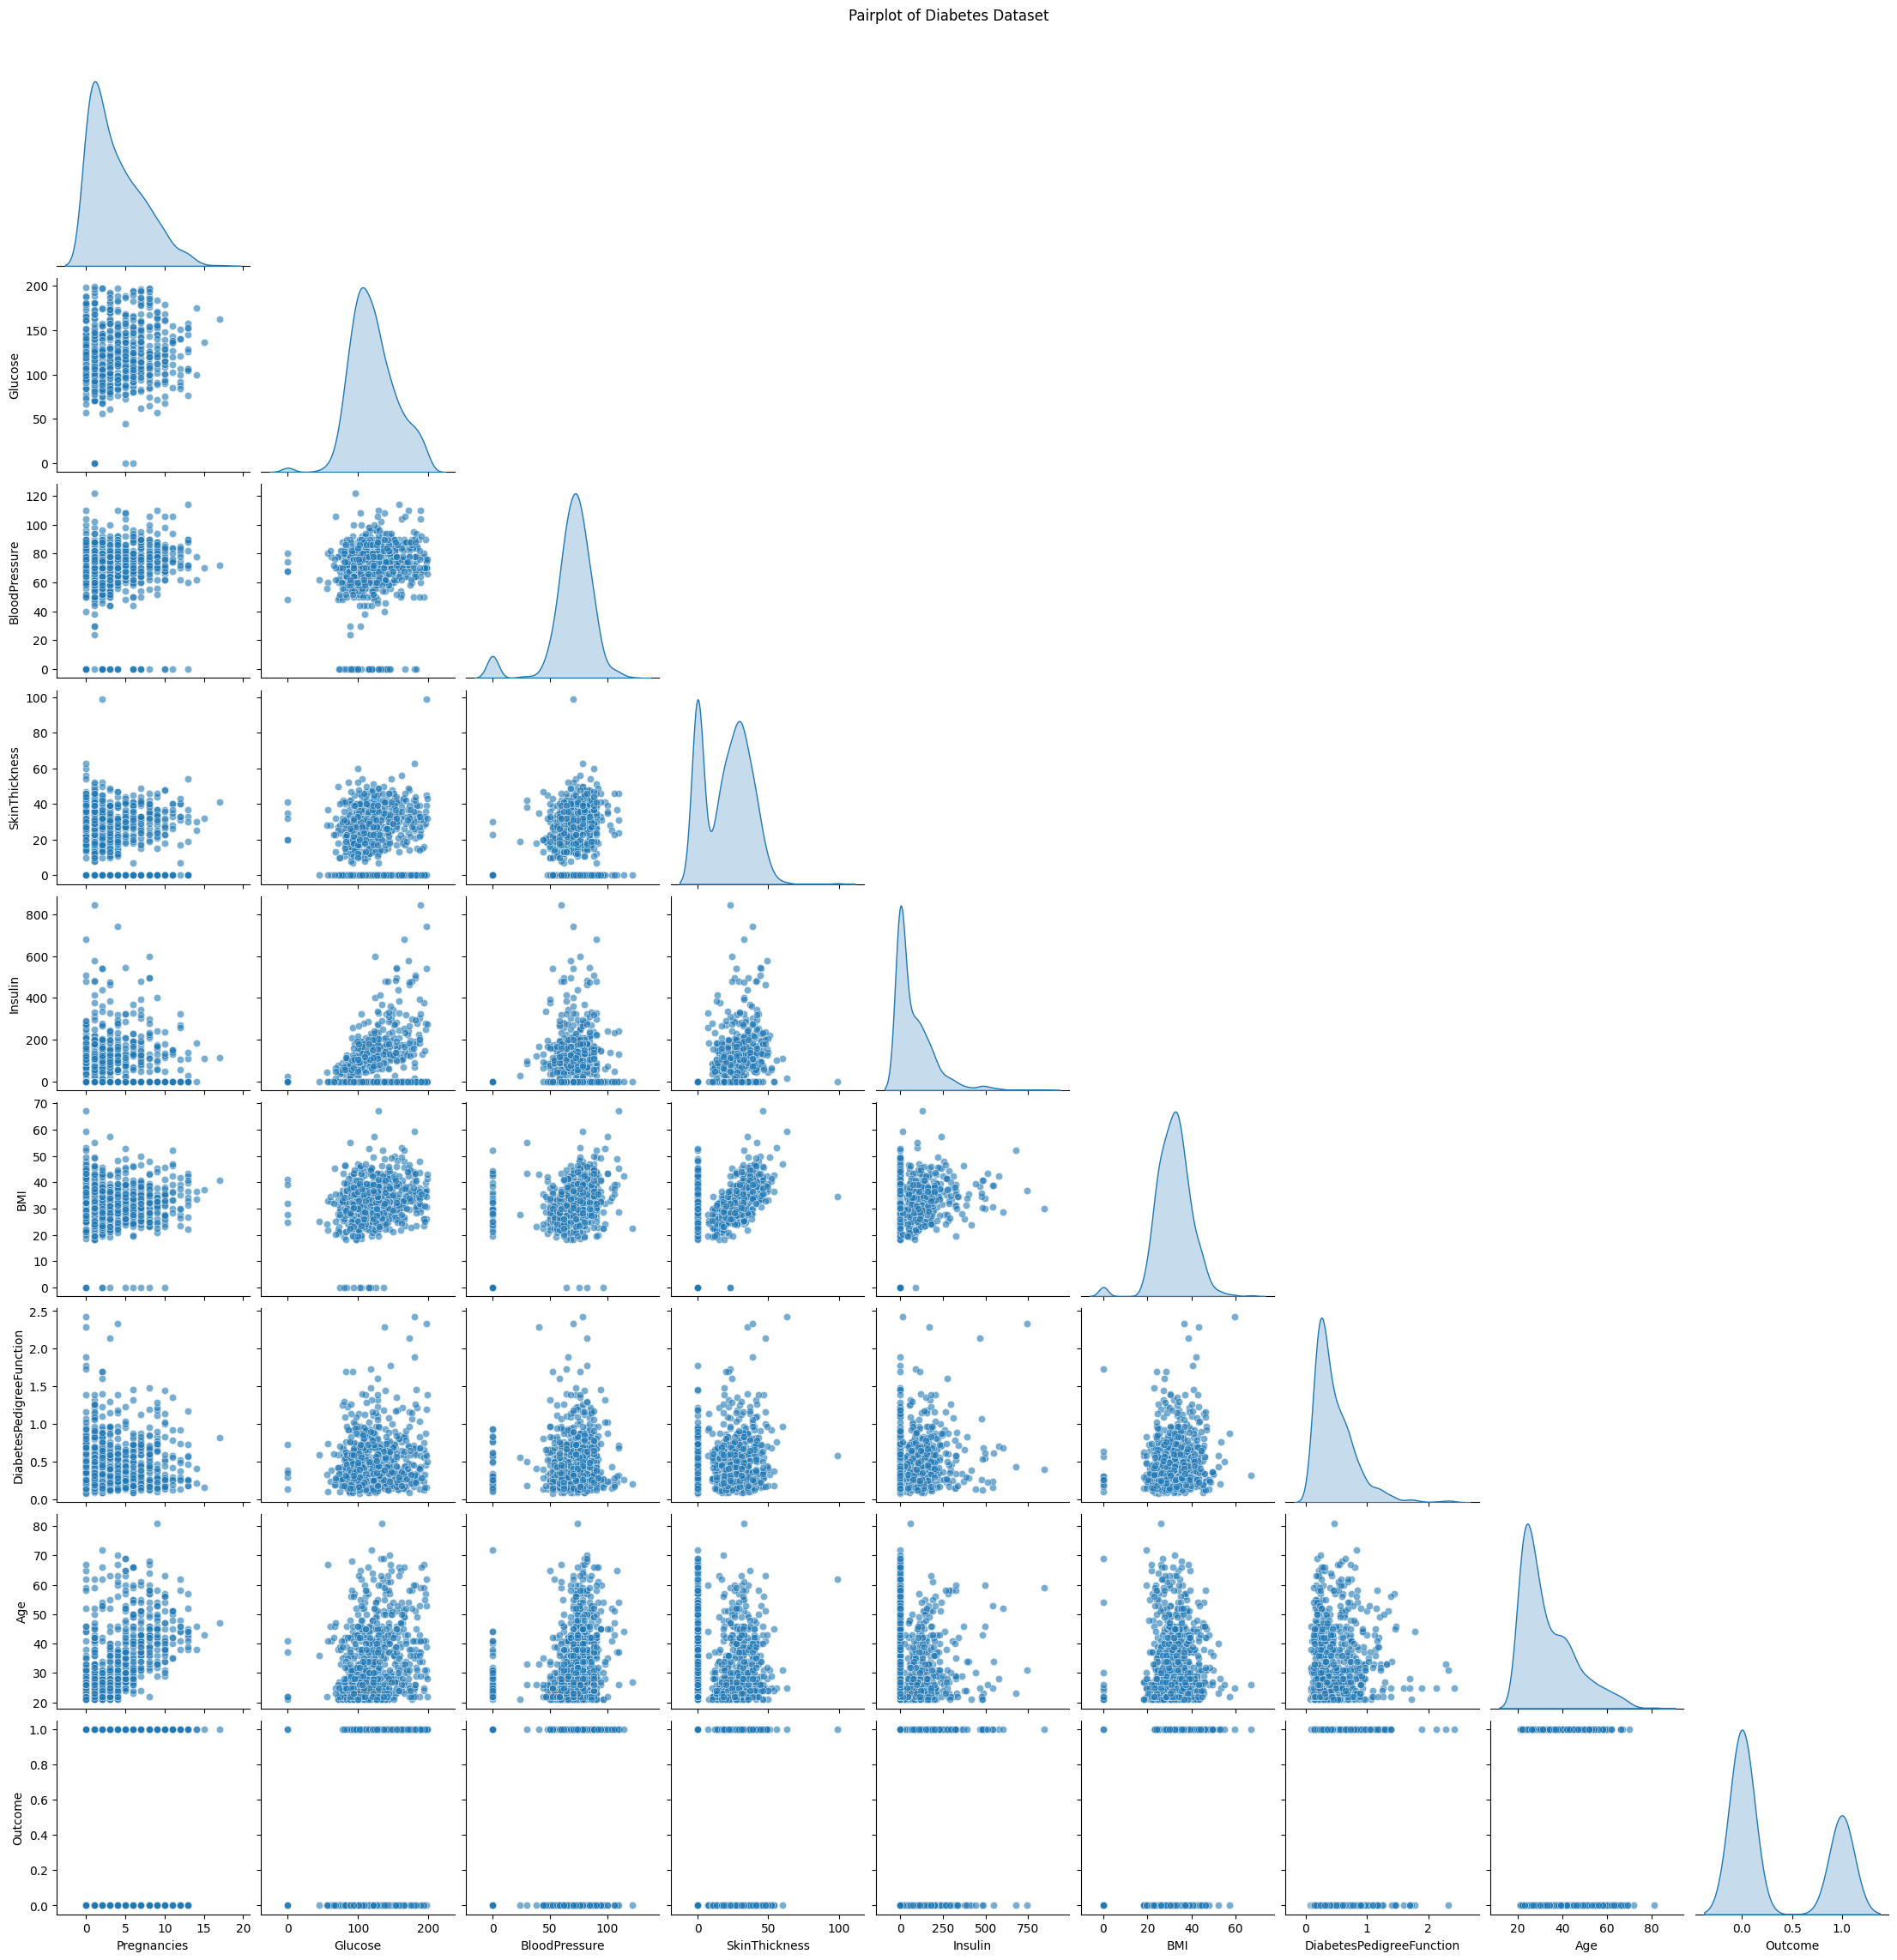

In [11]:
# 5. 추가 EDA: Pairplot (변수 간 관계 확인)
sns.pairplot(data, diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Diabetes Dataset", y=1.02)
plt.show()

In [12]:
# 6. 이상치 처리 (예시)
# 각 변수의 IQR(Interquartile Range)를 구해서 이상치 존재 여부 파악
def detect_outliers(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]

for col in num_cols:
    outliers = detect_outliers(col)
    print(f"\n{col} 이상치 개수: {outliers.shape[0]}")
    if outliers.shape[0] > 0:
        print(outliers.values)


Pregnancies 이상치 개수: 4
[15 17 14 14]

Glucose 이상치 개수: 5
[0 0 0 0 0]

BloodPressure 이상치 개수: 45
[  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]

SkinThickness 이상치 개수: 1
[99]

Insulin 이상치 개수: 34
[543 846 342 495 325 485 495 478 744 370 680 402 375 545 360 325 465 325
 415 579 474 328 480 326 330 600 321 440 540 480 335 387 392 510]

BMI 이상치 개수: 19
[ 0.   0.   0.   0.  53.2 55.   0.  67.1 52.3 52.3 52.9  0.   0.  59.4
  0.   0.  57.3  0.   0. ]

DiabetesPedigreeFunction 이상치 개수: 29
[2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.321 1.224 2.329 1.318 1.213
 1.353 1.224 1.391 1.476 2.137 1.731 1.268 1.6   2.42  1.251 1.699 1.258
 1.282 1.698 1.461 1.292 1.394]

Age 이상치 개수: 9
[69 67 72 81 67 67 70 68 69]

Outcome 이상치 개수: 0
